In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Estacionalidad

In [2]:
data = pd.read_csv('turistas_simple.csv')
data['Fecha']=pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

In [3]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller((data['Turistas']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print ('Resultados Test DF \n{}'.format(dfoutput))

Resultados Test DF 
Test Statistic                 -1.109176
p-value                         0.711399
#Lags Used                     12.000000
Number of Observations Used    85.000000
dtype: float64


Our p-value is definitely less than 0.5 and is even less than 0.01 so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary. Additionally, our ADF is much less than our 1% confidence value of -3.43, so we have another confirmation that we can reject the null.



In [4]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'Resultados Test KPSS')
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test((data['Turistas']))

Resultados Test KPSS
KPSS Statistic: 0.18233063171449485
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/juaiguar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/juaiguar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


# Turistas

In [6]:
df_serie = pd.read_csv('serie_tiempo_turistas_brasil.csv',  encoding='ISO-8859-1', sep = ';',
                       decimal = ',')[['año', 'mes', 'Total', 'Brasil']]

df_serie['MES'] = df_serie.groupby(['año']).cumcount()+1
df_serie['Fecha'] = df_serie['MES'].astype(str) + '-' + df_serie['año'].astype(str)
df_serie['Fecha'] = pd.to_datetime(df_serie['Fecha'],format='%m-%Y')

df_serie['Total'] = df_serie['Total'].astype(str).str.replace(',', '.').astype(float)
df_serie['Brasil'] = df_serie['Brasil'].astype(str).str.replace(',', '.').astype(float)

df_serie.index = df_serie['Fecha']
df_serie.drop(columns=['año','mes','Total','MES','Fecha'], inplace=True)

df_serie.columns = ['Turistas']
df_serie = df_serie[(df_serie.index >= '2012-01-01') & (df_serie.index < '2020-03-01')]
print(df_serie.shape)
df_serie.to_csv('turistas_simple.csv')

(98, 1)


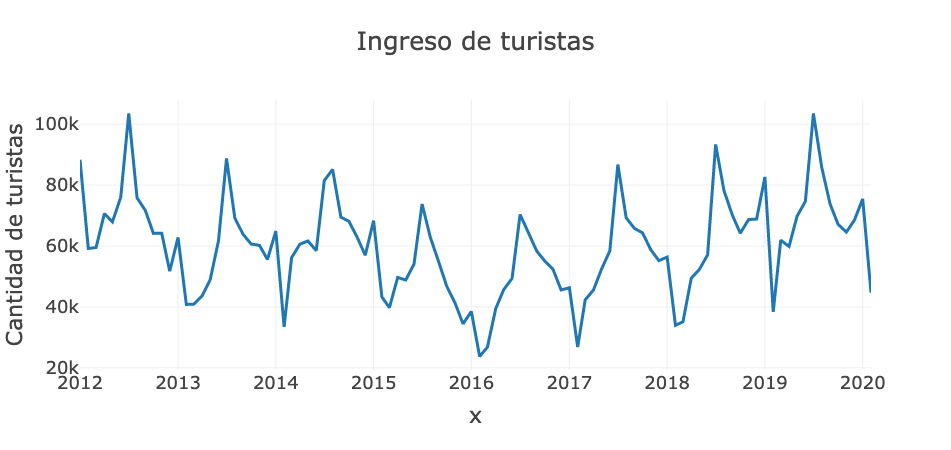

In [7]:
import plotly.express as px

fig = px.line(df_serie, x=df_serie.index, y="Turistas",
              labels = {"Fecha": "Fecha",
                        "Turistas": "Cantidad de turistas"},
              title='Ingreso de turistas',
              template='presentation')
fig.show()


# Dolar

In [7]:
df_dolar_brz = pd.read_csv('DEXBZUS.csv',  sep = ',')
df_dolar_brz['DATE'] = pd.to_datetime(df_dolar_brz['DATE'],format='%Y-%m-%d')

df_dolar_brz.index = df_dolar_brz['DATE']
df_dolar_brz.drop(columns=['DATE'], inplace=True)

df_dolar_brz['DEXBZUS'] = df_dolar_brz['DEXBZUS'].apply(pd.to_numeric, errors='coerce')
    
    
df_dolar = df_dolar_brz.resample('M').mean()
df_dolar = df_dolar[['DEXBZUS']]
df_dolar

DEXBZUS
DATE                
2010-01-31  1.781653
2010-02-28  1.842005
2010-03-31  1.785539
2010-04-30  1.756782
2010-05-31  1.814155
...              ...
2020-05-31  5.639445
2020-06-30  5.188414
2020-07-31  5.273518
2020-08-31  5.468533
2020-09-30  5.360189

[129 rows x 1 columns]

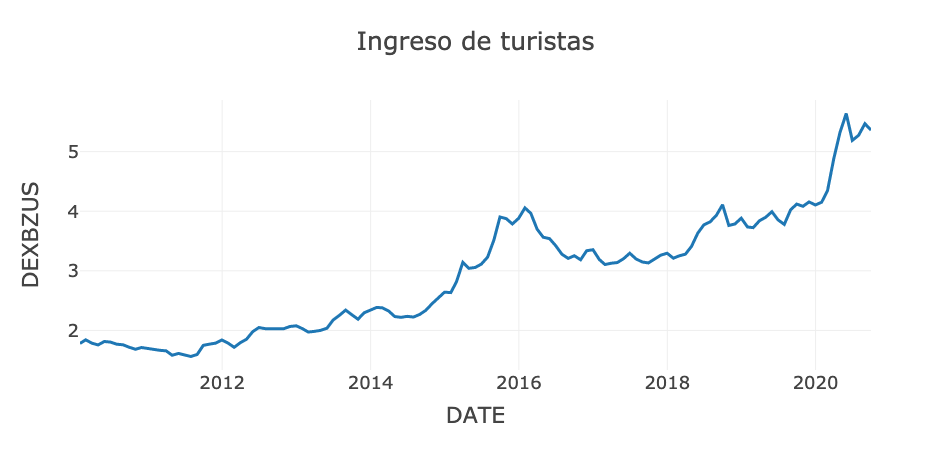

In [8]:

fig = px.line(df_dolar, x=df_dolar.index, y="DEXBZUS",

              title='Ingreso de turistas',
              template='presentation')
fig.show()


# Desempleo

https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=series-historicas

In [9]:
df_desempleo = pd.read_csv('desempleo_tri.csv',  sep = ';')

df_desempleo = df_desempleo.T.reset_index()
df_desempleo.columns = df_desempleo.iloc[0]
df_desempleo.drop(df_desempleo.index[0:2], inplace=True)
print(df_desempleo.shape)



df_desempleo['Quarter'] =  pd.date_range(start='2012', periods=34, freq='Q')
df_desempleo.index = df_desempleo['Quarter']
df_desempleo.drop(columns=['Grupo de idade','Quarter'], inplace=True)

for col in df_desempleo.columns:
    df_desempleo[col] = df_desempleo[col].astype(float)
    
df_desempleo.tail()

(34, 7)


0           14 a 17 anos  18 a 24 anos  25 a 39 anos  40 a 59 anos  \
Quarter                                                              
2019-06-30          42.2          25.8          11.1           7.2   
2019-09-30          40.6          25.7          10.8           7.1   
2019-12-31          39.2          23.8          10.3           6.6   
2020-03-31          44.0          27.1          11.2           7.5   
2020-06-30          42.8          29.7          12.9           8.7   

0           60 anos ou mais  Total  
Quarter                             
2019-06-30              4.8   12.0  
2019-09-30              4.6   11.8  
2019-12-31              4.2   11.0  
2020-03-31              4.4   12.2  
2020-06-30              4.8   13.3

In [10]:
dates = pd.date_range(start='2012', periods=102, freq='M')


monthly_desempleo = df_desempleo.asfreq('M')
monthly_desempleo = monthly_desempleo.reindex(dates)
monthly_desempleo = monthly_desempleo.interpolate(method ='linear', limit_direction ='backward') 

monthly_desempleo

0           14 a 17 anos  18 a 24 anos  25 a 39 anos  40 a 59 anos  \
2012-01-31     24.800000     16.400000      7.200000      4.000000   
2012-02-29     24.800000     16.400000      7.200000      4.000000   
2012-03-31     24.800000     16.400000      7.200000      4.000000   
2012-04-30     23.933333     16.166667      7.166667      3.866667   
2012-05-31     23.066667     15.933333      7.133333      3.733333   
...                  ...           ...           ...           ...   
2020-02-29     42.400000     26.000000     10.900000      7.200000   
2020-03-31     44.000000     27.100000     11.200000      7.500000   
2020-04-30     43.600000     27.966667     11.766667      7.900000   
2020-05-31     43.200000     28.833333     12.333333      8.300000   
2020-06-30     42.800000     29.700000     12.900000      8.700000   

0           60 anos ou mais      Total  
2012-01-31         2.000000   7.900000  
2012-02-29         2.000000   7.900000  
2012-03-31         2.000000   7.900000  
2012-04-30         2.066667   7.766667  
2012-05-31         2.133333   7.633333  
...                     ...        ...  
2020-02-29         4.333333  11.800000  
2020-03-31         4.400000  12.200000  
2020-04-30         4.533333  12.566667  
2020-05-31         4.666667  12.933333  
2020-06-30         4.800000  13.300000  

[102 rows x 6 columns]

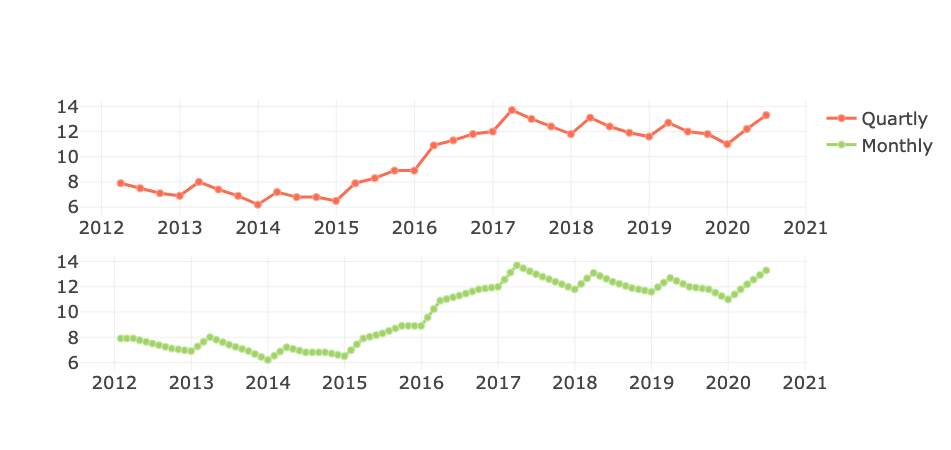

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)


trace1 = (go.Scatter(x=df_desempleo.index, y=df_desempleo.Total,
                    mode='lines+markers',
                    name='Quartly',
                    marker=dict(
                        color='#FA6D51',
                        size=7,
                        line=dict(
                            color='#FCA391',
                            width=1)
                    )
                    )
         )
trace2 = (go.Scatter(x=monthly_desempleo.index,
                     y=monthly_desempleo.Total,
                    mode='lines+markers',
                    name='Monthly',
                    marker=dict(
                        color='#A0D468',
                        size=7,
                        line=dict(
                            color='#CBE9AC',
                            width=1)
                    )
                    )
         )

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(template='presentation')

fig.show()

# PBI

https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9300-contas-nacionais-trimestrais.html?=&t=series-historicas

In [12]:
df_pbi = pd.read_csv('PIB.csv',  sep = ';')

df_pbi = df_pbi.T.reset_index()
df_pbi.columns = ['Fecha','PIB']
df_pbi.drop(df_pbi.index[0:1], inplace=True)
print(df_pbi.shape)



df_pbi['Quarter'] =  pd.date_range(start='1996', periods=98, freq='Q')
df_pbi.index = df_pbi['Quarter']
df_pbi.drop(columns=['Fecha','Quarter'], inplace=True)

for col in df_pbi.columns:
    df_pbi[col] = df_pbi[col].astype(float)
    
df_pbi

(98, 2)


PIB
Quarter        
1996-03-31  2.5
1996-06-30  2.1
1996-09-30  2.3
1996-12-31  2.2
1997-03-31  3.2
...         ...
2019-06-30  1.1
2019-09-30  1.0
2019-12-31  1.1
2020-03-31  0.9
2020-06-30 -2.2

[98 rows x 1 columns]

In [13]:
dates = pd.date_range(start='1996', periods=294, freq='M')


monthly_pbi = df_pbi.asfreq('M')
monthly_pbi = monthly_pbi.reindex(dates)
monthly_pbi = monthly_pbi.interpolate(method ='linear', limit_direction ='backward') 

monthly_pbi

PIB
1996-01-31  2.500000
1996-02-29  2.500000
1996-03-31  2.500000
1996-04-30  2.366667
1996-05-31  2.233333
...              ...
2020-02-29  0.966667
2020-03-31  0.900000
2020-04-30 -0.133333
2020-05-31 -1.166667
2020-06-30 -2.200000

[294 rows x 1 columns]

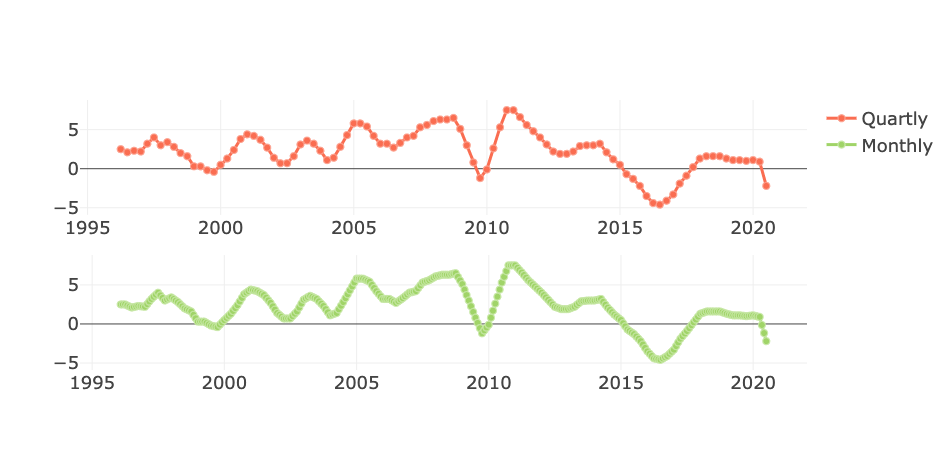

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)


trace1 = (go.Scatter(x=df_pbi.index, y=df_pbi.PIB,
                    mode='lines+markers',
                    name='Quartly',
                    marker=dict(
                        color='#FA6D51',
                        size=7,
                        line=dict(
                            color='#FCA391',
                            width=1)
                    )
                    )
         )
trace2 = (go.Scatter(x=monthly_pbi.index,
                     y=monthly_pbi.PIB,
                    mode='lines+markers',
                    name='Monthly',
                    marker=dict(
                        color='#A0D468',
                        size=7,
                        line=dict(
                            color='#CBE9AC',
                            width=1)
                    )
                    )
         )

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(template='presentation')

fig.show()

# ingresos_trimestrales

In [15]:
df_ingresos = pd.read_csv('ingresos_trimestrales.csv',  sep = ',', header=None, usecols=[0,2])

df_ingresos.columns = ['Quarter','Ingreso']
print(df_ingresos.shape)



df_ingresos['Quarter'] =  pd.date_range(start='2012', periods=34, freq='Q')
df_ingresos.index = df_ingresos['Quarter']
df_ingresos.drop(columns=['Quarter'], inplace=True)

for col in df_ingresos.columns:
    df_ingresos[col] = df_ingresos[col].astype(float)
    
df_ingresos

(34, 2)


Ingreso
Quarter            
2012-03-31   1387.0
2012-06-30   1410.0
2012-09-30   1433.0
2012-12-31   1454.0
2013-03-31   1513.0
2013-06-30   1553.0
2013-09-30   1584.0
2013-12-31   1597.0
2014-03-31   1662.0
2014-06-30   1685.0
2014-09-30   1710.0
2014-12-31   1734.0
2015-03-31   1790.0
2015-06-30   1828.0
2015-09-30   1835.0
2015-12-31   1852.0
2016-03-31   1915.0
2016-06-30   1922.0
2016-09-30   1965.0
2016-12-31   1991.0
2017-03-31   2035.0
2017-06-30   2023.0
2017-09-30   2037.0
2017-12-31   2065.0
2018-03-31   2106.0
2018-06-30   2130.0
2018-09-30   2157.0
2018-12-31   2183.0
2019-03-31   2216.0
2019-06-30   2214.0
2019-09-30   2223.0
2019-12-31   2261.0
2020-03-31   2323.0
2020-06-30   2426.0

In [16]:
dates = pd.date_range(start='2012', periods=102, freq='M')


monthly_ingresps = df_ingresos.asfreq('M')
monthly_ingresps = monthly_ingresps.reindex(dates)
monthly_ingresps = monthly_ingresps.interpolate(method ='linear', limit_direction ='backward') 

monthly_ingresps

Ingreso
2012-01-31  1387.000000
2012-02-29  1387.000000
2012-03-31  1387.000000
2012-04-30  1394.666667
2012-05-31  1402.333333
...                 ...
2020-02-29  2302.333333
2020-03-31  2323.000000
2020-04-30  2357.333333
2020-05-31  2391.666667
2020-06-30  2426.000000

[102 rows x 1 columns]

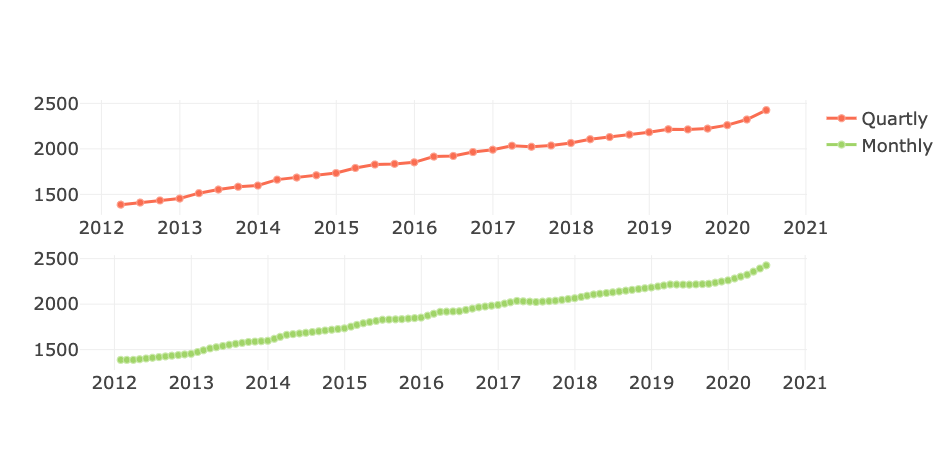

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)


trace1 = (go.Scatter(x=df_ingresos.index, y=df_ingresos.Ingreso,
                    mode='lines+markers',
                    name='Quartly',
                    marker=dict(
                        color='#FA6D51',
                        size=7,
                        line=dict(
                            color='#FCA391',
                            width=1)
                    )
                    )
         )
trace2 = (go.Scatter(x=monthly_ingresps.index,
                     y=monthly_ingresps.Ingreso,
                    mode='lines+markers',
                    name='Monthly',
                    marker=dict(
                        color='#A0D468',
                        size=7,
                        line=dict(
                            color='#CBE9AC',
                            width=1)
                    )
                    )
         )

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(template='presentation')

fig.show()

# IPCA

https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

In [18]:
df_ipca = pd.read_csv('IPCA.csv',  sep = ';')

df_ipca = df_ipca.T.reset_index()
df_ipca.drop(df_ipca.index[0:7], inplace=True)
df_ipca.columns = ['Mes','IPCA']

df_ipca['Fecha'] = pd.date_range(start='1995', periods=308, freq='M')
df_ipca['IPCA'] = df_ipca['IPCA'].astype(str).str.replace(',', '.').astype(float)


df_ipca.index = df_ipca['Fecha']
df_ipca.drop(columns=['Fecha','Mes'], inplace=True)

print(df_ipca.shape)
df_ipca

(308, 1)


IPCA
Fecha           
1995-01-31  1.70
1995-02-28  1.02
1995-03-31  1.55
1995-04-30  2.43
1995-05-31  2.67
...          ...
2020-04-30 -0.31
2020-05-31 -0.38
2020-06-30  0.26
2020-07-31  0.36
2020-08-31  0.24

[308 rows x 1 columns]

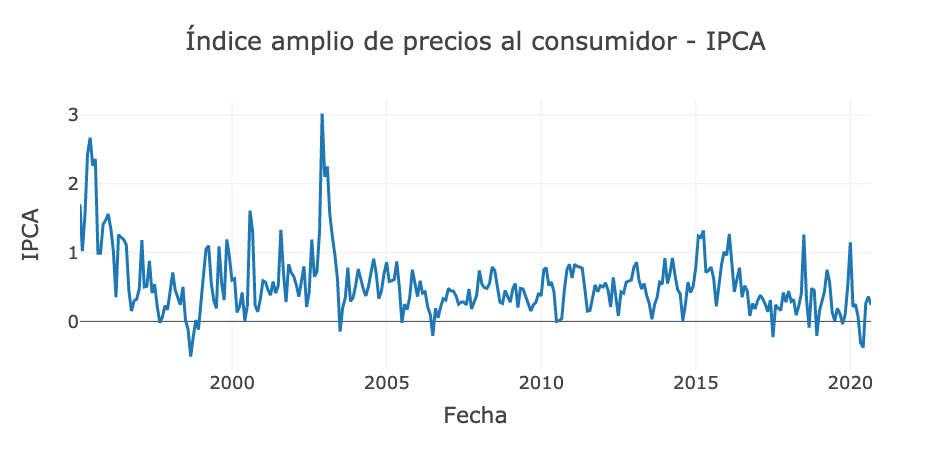

In [19]:

fig = px.line(df_ipca, x=df_ipca.index, y="IPCA",
              title='Índice amplio de precios al consumidor - IPCA',
              template='presentation')
fig.show()


# Dolar Argentina

https://datos.gob.ar/dataset/sspm-tipo-cambio--usd---futuro-dolar

In [20]:
df_dolar_arg = pd.read_csv('dolar_argentina.csv',  sep = ',')
df_dolar_arg['indice_tiempo'] = pd.to_datetime(df_dolar_arg['indice_tiempo'],format='%Y-%m-%d')
df_dolar_arg = df_dolar_arg[df_dolar_arg['indice_tiempo']>'2010-01-01']

df_dolar_arg.index = df_dolar_arg['indice_tiempo']
df_dolar_arg.drop(columns=['indice_tiempo'], inplace=True)

for col in df_dolar_arg.columns:
    df_dolar_arg[col] = df_dolar_arg[col].astype(float)
    
    
df_dolar_arg_mon = df_dolar_arg.resample('M').mean()
df_dolar_arg_mon = df_dolar_arg_mon[['tipo_cambio_a3500']]
df_dolar_arg_mon

tipo_cambio_a3500
indice_tiempo                   
2010-01-31              3.804823
2010-02-28              3.852089
2010-03-31              3.862510
2010-04-30              3.875447
2010-05-31              3.901474
...                          ...
2020-03-31             63.247110
2020-04-30             65.675317
2020-05-31             67.705968
2020-06-30             69.549000
2020-07-31             71.378171

[127 rows x 1 columns]

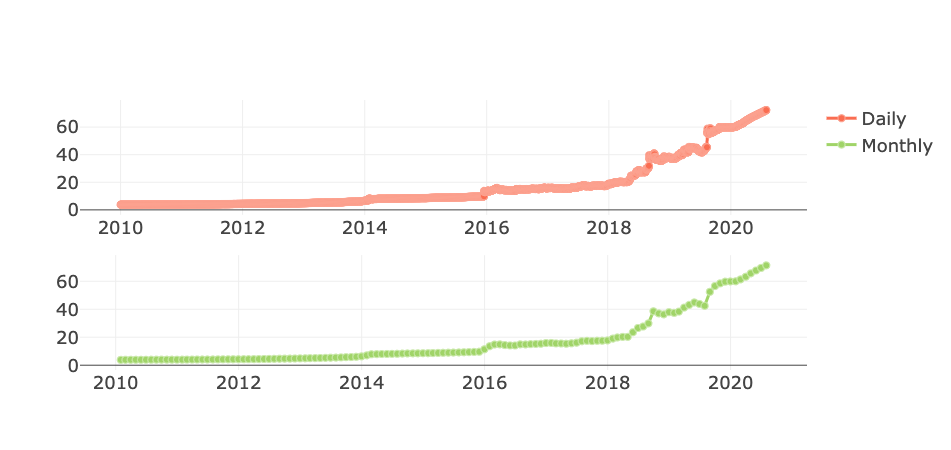

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)


trace1 = (go.Scatter(x=df_dolar_arg.index, y=df_dolar_arg.tipo_cambio_a3500,
                    mode='lines+markers',
                    name='Daily',
                    marker=dict(
                        color='#FA6D51',
                        size=7,
                        line=dict(
                            color='#FCA391',
                            width=1)
                    )
                    )
         )
trace2 = (go.Scatter(x=df_dolar_arg_mon.index,
                     y=df_dolar_arg_mon.tipo_cambio_a3500,
                    mode='lines+markers',
                    name='Monthly',
                    marker=dict(
                        color='#A0D468',
                        size=7,
                        line=dict(
                            color='#CBE9AC',
                            width=1)
                    )
                    )
         )

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(template='presentation')

fig.show()

# Temperatura BA

https://www.estadisticaciudad.gob.ar/eyc/?cat=263

In [22]:
df_temp = pd.read_excel('temp_BA.xlsx')
df_temp.index= df_temp['Mes']
df_temp.drop(columns=['Mes'], inplace=True)
df_temp

2010 Unnamed: 2    2011 Unnamed: 4    2012 Unnamed: 6    2013  \
Mes                                                                           
NaN         Máxima     Mínima  Máxima     Mínima  Máxima     Mínima  Máxima   
Enero         31.1       20.9    30.6       20.9    31.8       20.7    30.3   
Febrero       28.2       20.2    28.6       19.4      30       19.7    29.1   
Marzo         27.6       18.5    27.4       17.6    26.6       16.8    25.2   
Abril         22.9       13.1    23.7       14.1    23.3       12.8    24.3   
Mayo          20.1       11.7      19       10.7    20.6       13.2    19.4   
Junio         16.9        8.8    15.6        8.4    16.6        7.9    17.8   
Julio         15.3          7    15.6        6.7    14.7        4.9    16.3   
Agosto        16.6        7.2    15.1        7.7    17.3       10.2      18   
Septiembre    19.6       10.9    21.7       10.5    20.2       11.1    18.8   
Octubre       21.8       12.2    22.1       12.5    22.6         14      23   
Noviembre     26.5       15.2    27.7       17.5    27.7       17.1    26.1   
Diciembre     30.6       19.6    28.1       17.7    29.9       19.1    32.5   

           Unnamed: 8    2014 Unnamed: 10  ...    2016 Unnamed: 14    2017  \
Mes                                        ...                               
NaN            Mínima  Máxima      Mínima  ...  Máxima      Mínima  Máxima   
Enero            20.2    31.2          20  ...      31        21.3    30.4   
Febrero          19.2      27        18.9  ...    31.2          21    30.1   
Marzo            15.4    25.5        15.9  ...    25.8        16.5    26.9   
Abril            13.9    22.4        14.2  ...    20.6          14    23.5   
Mayo             10.6    18.5        11.4  ...      16         9.2    19.5   
Junio             8.1      17         7.8  ...    14.8         6.4    17.9   
Julio             7.7    16.5         8.3  ...    14.1         7.8      17   
Agosto            7.3    20.5        10.2  ...    18.8         8.6    19.2   
Septiembre         10    20.7        11.5  ...    19.2         9.9    20.3   
Octubre          13.9    24.8        15.6  ...    21.8        13.8      23   
Noviembre        16.1    26.1        15.7  ...    26.5        15.7    26.2   
Diciembre        21.5      29        17.9  ...    30.8        19.7    30.3   

           Unnamed: 16    2018 Unnamed: 18    2019 Unnamed: 20    2020  \
Mes                                                                      
NaN             Mínima  Máxima      Mínima  Máxima      Mínima  Máxima   
Enero             20.9    31.4        20.8    29.3        20.7      30   
Febrero           20.6    30.4        20.3    29.1        19.2    29.6   
Marzo               18    27.9        17.1    25.6        16.8    28.6   
Abril             14.3    25.7        18.6    24.3          15    22.8   
Mayo              12.3    20.3        13.2    20.1          12    20.4   
Junio              9.5    15.7         6.9    17.8        11.3    16.9   
Julio              9.7    13.5           8    15.9        11.7    15.1   
Agosto            11.1      17           8    17.1         8.6      19   
Septiembre        11.6    21.5        13.8    20.4        10.4     NaN   
Octubre           11.3    22.4        13.2      22          13     NaN   
Noviembre         15.2    26.3        16.7    27.8        17.6     NaN   
Diciembre         19.1    27.4        17.6    29.5          18     NaN   

           Unnamed: 22  
Mes                     
NaN             Mínima  
Enero             20.2  
Febrero           19.3  
Marzo             20.1  
Abril             13.6  
Mayo                11  
Junio              9.1  
Julio              6.7  
Agosto             9.2  
Septiembre         NaN  
Octubre            NaN  
Noviembre          NaN  
Diciembre          NaN  

[13 rows x 22 columns]

In [23]:
index_cols = list(range(0, df_temp.shape[1]))

##Max
df_temp_max = df_temp.iloc[:,index_cols[0::2]].copy()
df_temp_max.drop(df_temp_max.index[0:1], inplace=True)

##Min

df_temp_min = df_temp.iloc[:,index_cols[1::2]].copy()
df_temp_min.drop(df_temp_min.index[0:1], inplace=True)

df_temp_min.columns = df_temp_max.columns
df_temp_min.reset_index(inplace=True)
df_temp_max.reset_index(inplace=True)

display(df_temp_min, df_temp_max)

Mes  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
0        Enero  20.9  20.9  20.7  20.2    20  19.2  21.3  20.9  20.8  20.7   
1      Febrero  20.2  19.4  19.7  19.2  18.9    20    21  20.6  20.3  19.2   
2        Marzo  18.5  17.6  16.8  15.4  15.9  17.9  16.5    18  17.1  16.8   
3        Abril  13.1  14.1  12.8  13.9  14.2  15.4    14  14.3  18.6    15   
4         Mayo  11.7  10.7  13.2  10.6  11.4  12.4   9.2  12.3  13.2    12   
5        Junio   8.8   8.4   7.9   8.1   7.8   8.8   6.4   9.5   6.9  11.3   
6        Julio     7   6.7   4.9   7.7   8.3   8.7   7.8   9.7     8  11.7   
7       Agosto   7.2   7.7  10.2   7.3  10.2  11.4   8.6  11.1     8   8.6   
8   Septiembre  10.9  10.5  11.1    10  11.5  10.1   9.9  11.6  13.8  10.4   
9      Octubre  12.2  12.5    14  13.9  15.6  11.7  13.8  11.3  13.2    13   
10   Noviembre  15.2  17.5  17.1  16.1  15.7  15.5  15.7  15.2  16.7  17.6   
11   Diciembre  19.6  17.7  19.1  21.5  17.9  19.9  19.7  19.1  17.6    18   

    2020  
0   20.2  
1   19.3  
2   20.1  
3   13.6  
4     11  
5    9.1  
6    6.7  
7    9.2  
8    NaN  
9    NaN  
10   NaN  
11   NaN

Mes  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
0        Enero  31.1  30.6  31.8  30.3  31.2  29.4    31  30.4  31.4  29.3   
1      Febrero  28.2  28.6    30  29.1    27  29.5  31.2  30.1  30.4  29.1   
2        Marzo  27.6  27.4  26.6  25.2  25.5    28  25.8  26.9  27.9  25.6   
3        Abril  22.9  23.7  23.3  24.3  22.4    26  20.6  23.5  25.7  24.3   
4         Mayo  20.1    19  20.6  19.4  18.5  21.2    16  19.5  20.3  20.1   
5        Junio  16.9  15.6  16.6  17.8    17  18.2  14.8  17.9  15.7  17.8   
6        Julio  15.3  15.6  14.7  16.3  16.5  16.7  14.1    17  13.5  15.9   
7       Agosto  16.6  15.1  17.3    18  20.5  18.7  18.8  19.2    17  17.1   
8   Septiembre  19.6  21.7  20.2  18.8  20.7  19.2  19.2  20.3  21.5  20.4   
9      Octubre  21.8  22.1  22.6    23  24.8  20.2  21.8    23  22.4    22   
10   Noviembre  26.5  27.7  27.7  26.1  26.1  24.8  26.5  26.2  26.3  27.8   
11   Diciembre  30.6  28.1  29.9  32.5    29  29.8  30.8  30.3  27.4  29.5   

    2020  
0     30  
1   29.6  
2   28.6  
3   22.8  
4   20.4  
5   16.9  
6   15.1  
7     19  
8    NaN  
9    NaN  
10   NaN  
11   NaN

In [24]:
df_temp_min = df_temp_min.melt(id_vars=['Mes'], 
                    var_name="Date", 
                    value_name="Value")

df_temp_min['MES'] = df_temp_min.groupby(['Date']).cumcount()+1
df_temp_min['Fecha'] = df_temp_min['MES'].astype(str) + '-' + df_temp_min['Date'].astype(str)
df_temp_min['Fecha'] = pd.to_datetime(df_temp_min['Fecha'],format='%m-%Y')

df_temp_min.index = df_temp_min['Fecha']
df_temp_min = df_temp_min.loc[pd.notnull(df_temp_min['Value']), ['Value']]
df_temp_min.columns = ['temp_min']

In [25]:
df_temp_max = df_temp_max.melt(id_vars=['Mes'], 
                    var_name="Date", 
                    value_name="Value")

df_temp_max['MES'] = df_temp_max.groupby(['Date']).cumcount()+1
df_temp_max['Fecha'] = df_temp_max['MES'].astype(str) + '-' + df_temp_max['Date'].astype(str)
df_temp_max['Fecha'] = pd.to_datetime(df_temp_max['Fecha'],format='%m-%Y')

df_temp_max.index = df_temp_max['Fecha']
df_temp_max = df_temp_max.loc[pd.notnull(df_temp_max['Value']), ['Value']]
df_temp_max.columns = ['temp_max']

# Hoteles

https://www.estadisticaciudad.gob.ar/eyc/?p=27291

In [26]:
dates = pd.date_range(start='2008', periods=149, freq='M')
df_hoteles= pd.read_excel('hoteles.xlsx')
df_hoteles['Fecha'] = dates
df_hoteles.index = df_hoteles['Fecha']
df_hoteles = df_hoteles[(df_hoteles['Fecha']<'2020-03-01')]
df_hoteles.drop(columns=['Fecha','Año','Mes'], inplace=True)

df_hoteles

1 y 2 estrellas 3 estrellas 4 estrellas 5 estrellas    Apart  \
Fecha                                                                     
2008-01-31         97.1705      162.31     230.311     581.913      202   
2008-02-29         104.273     161.224     222.164     589.522  205.538   
2008-03-31         103.091       168.5     237.295     645.217  216.692   
2008-04-30         103.909     168.224      243.82      622.87  223.385   
2008-05-31         105.466     169.672     254.274     654.435  224.462   
...                    ...         ...         ...         ...      ...   
2019-10-31         1407.33     1943.82     3631.19     9788.19   2879.9   
2019-11-30         1384.02     2473.14     3924.42     10813.5   2997.1   
2019-12-31         1421.06     2176.37     4009.06     11301.4  3115.46   
2020-01-31         1466.14      2155.8     3805.12     10676.3  4056.41   
2020-02-29         1341.28     2340.02     3625.67     9144.38  3838.12   

           Boutique   Hostel Otros/resto  
Fecha                                     
2008-01-31    344.8  38.9542     60.3681  
2008-02-29  374.731   38.313     66.0613  
2008-03-31  405.148  37.9478     66.2025  
2008-04-30      369  39.0602     61.4815  
2008-05-31  374.517  40.3333     64.0494  
...             ...      ...         ...  
2019-10-31  6711.48  522.945      888.38  
2019-11-30  6467.28  526.057     915.901  
2019-12-31   6129.7  574.556     961.958  
2020-01-31  6219.67  520.731     1077.09  
2020-02-29  6537.09  364.615     780.342  

[146 rows x 8 columns]

In [27]:
df_hoteles.columns

Index(['1 y 2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas', 'Apart',
       'Boutique', 'Hostel', 'Otros/resto'],
      dtype='object')

# Cepo

https://chequeado.com/el-explicador/cronologia-del-cepo-cambiario-como-vario-entre-2011-y-2020/

In [28]:
dates = pd.date_range(start='2012', periods=102, freq='M')

df_cepo = pd.DataFrame({

                   'forecast_date': dates})
df_cepo['CEPO'] = 1
df_cepo.loc[(df_cepo['forecast_date']>='2017-01-01') &
            (df_cepo['forecast_date']<'2019-09-01') , 'CEPO'] = 0

df_cepo.index = df_cepo['forecast_date']
df_cepo.drop(columns=['forecast_date'], inplace=True)
df_cepo

CEPO
forecast_date      
2012-01-31        1
2012-02-29        1
2012-03-31        1
2012-04-30        1
2012-05-31        1
...             ...
2020-02-29        1
2020-03-31        1
2020-04-30        1
2020-05-31        1
2020-06-30        1

[102 rows x 1 columns]

# Unión

In [29]:
from functools import reduce

dfs = [df_serie, df_dolar,  monthly_desempleo, monthly_pbi,
       monthly_ingresps, df_ipca, df_dolar_arg_mon, df_temp_max, df_temp_min,df_cepo, df_hoteles]
for df in dfs:
    df.index =  df.index.values.astype('datetime64[M]')


df_final = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True, how='left'), dfs)
print(df_final.shape)
df_final

(98, 23)


Turistas   DEXBZUS  14 a 17 anos  18 a 24 anos  25 a 39 anos  \
2012-01-01  88318.57205  1.785035     24.800000     16.400000      7.200000   
2012-02-01  59186.46835  1.716800     24.800000     16.400000      7.200000   
2012-03-01  59478.95959  1.795300     24.800000     16.400000      7.200000   
2012-04-01  70629.60541  1.852248     23.933333     16.166667      7.166667   
2012-05-01  67893.16757  1.981023     23.066667     15.933333      7.133333   
...                 ...       ...           ...           ...           ...   
2019-10-01  67129.00000  4.082545     40.133333     25.066667     10.633333   
2019-11-01  64563.00000  4.155795     39.666667     24.433333     10.466667   
2019-12-01  68464.00000  4.104486     39.200000     23.800000     10.300000   
2020-01-01  75454.00000  4.151162     40.800000     24.900000     10.600000   
2020-02-01  44684.00000  4.347016     42.400000     26.000000     10.900000   

            40 a 59 anos  60 anos ou mais      Total       PIB      Ingreso  \
2012-01-01      4.000000         2.000000   7.900000  3.700000  1387.000000   
2012-02-01      4.000000         2.000000   7.900000  3.400000  1387.000000   
2012-03-01      4.000000         2.000000   7.900000  3.100000  1387.000000   
2012-04-01      3.866667         2.066667   7.766667  2.800000  1394.666667   
2012-05-01      3.733333         2.133333   7.633333  2.500000  1402.333333   
...                  ...              ...        ...       ...          ...   
2019-10-01      6.933333         4.466667  11.533333  1.033333  2235.666667   
2019-11-01      6.766667         4.333333  11.266667  1.066667  2248.333333   
2019-12-01      6.600000         4.200000  11.000000  1.100000  2261.000000   
2020-01-01      6.900000         4.266667  11.400000  1.033333  2281.666667   
2020-02-01      7.200000         4.333333  11.800000  0.966667  2302.333333   

            ...  temp_min  CEPO 1 y 2 estrellas 3 estrellas  4 estrellas  \
2012-01-01  ...      20.7     1         192.061     272.381      372.513   
2012-02-01  ...      19.7     1         196.051     273.111      375.705   
2012-03-01  ...      16.8     1         202.576     276.619      399.543   
2012-04-01  ...      12.8     1         207.394     280.175      388.519   
2012-05-01  ...      13.2     1           199.8       280.3      387.704   
...         ...       ...   ...             ...         ...          ...   
2019-10-01  ...        13     1         1407.33     1943.82      3631.19   
2019-11-01  ...      17.6     1         1384.02     2473.14      3924.42   
2019-12-01  ...        18     1         1421.06     2176.37      4009.06   
2020-01-01  ...      20.2     1         1466.14      2155.8      3805.12   
2020-02-01  ...      19.3     1         1341.28     2340.02      3625.67   

           5 estrellas    Apart Boutique   Hostel Otros/resto  
2012-01-01     840.913    352.8  525.704  86.5702     125.101  
2012-02-01     835.522  345.233  509.654  83.2541     125.133  
2012-03-01     897.417  355.795  525.444  88.8319     122.918  
2012-04-01     850.458    356.1    510.1  73.0517     126.975  
2012-05-01     827.917  355.946  497.123  72.8276     132.605  
...                ...      ...      ...      ...         ...  
2019-10-01     9788.19   2879.9  6711.48  522.945      888.38  
2019-11-01     10813.5   2997.1  6467.28  526.057     915.901  
2019-12-01     11301.4  3115.46   6129.7  574.556     961.958  
2020-01-01     10676.3  4056.41  6219.67  520.731     1077.09  
2020-02-01     9144.38  3838.12  6537.09  364.615     780.342  

[98 rows x 23 columns]

In [30]:
df_final.to_csv('df_final.csv', index=True)